In [1]:
import m_ll
import m_tree

print("START")

START


### Linked List

In [2]:
LL_Obj = m_ll.LL(123)
LL_Obj.push_back("ABC")
LL_Obj.push_back("QWERTY")
LL_Obj.push_forword(987)
LL_Obj.print_ll()

LL_Obj.insert_after("ABC", "XYZ")
LL_Obj.del_el(123)
LL_Obj.print_ll()
LL_Obj.ll_length()

987 | 123 | ABC | QWERTY | 
987 | ABC | XYZ | QWERTY | 


4

### Binary Tree

In [3]:
BT_Obj = m_tree.PyBinTree(20)
BT_Obj.add_el(15)
BT_Obj.add_el(17)
BT_Obj.add_el(10)
BT_Obj.add_el(13)
BT_Obj.add_el(30)
BT_Obj.add_el(35)
BT_Obj.add_el(32)
BT_Obj.add_el(25)
BT_Obj.add_el(23)
BT_Obj.add_el(27)

In [4]:
BT_Obj.print_tree()

13
None <- | -> None
10
None <- | ->  13
17
None <- | -> None
15
10  <- | ->  17
23
None <- | -> None
27
None <- | -> None
25
23  <- | ->  27
32
None <- | -> None
35
32  <- | -> None
30
25  <- | ->  35
20
15  <- | ->  30


In [5]:
print(BT_Obj.l_plot())

[(4, 13, 13, 13), (3, 10, 10, 13), (3, 17, 17, 17), (2, 15, 10, 17), (4, 23, 23, 23), (4, 27, 27, 27), (3, 25, 23, 27), (4, 32, 32, 32), (3, 35, 32, 35), (2, 30, 25, 35), (1, 20, 15, 30)]


In [7]:
import pandas as pd

dtTree = pd.DataFrame(BT_Obj.l_plot())
dtTree.columns = ['Level', 'Data', 'Left', 'Right']

dtTree.tail()

,Level,Data,Left,Right
6,3,25,23,27
7,4,32,32,32
8,3,35,32,35
9,2,30,25,35
10,1,20,15,30


<AxesSubplot:xlabel='Level', ylabel='Data'>

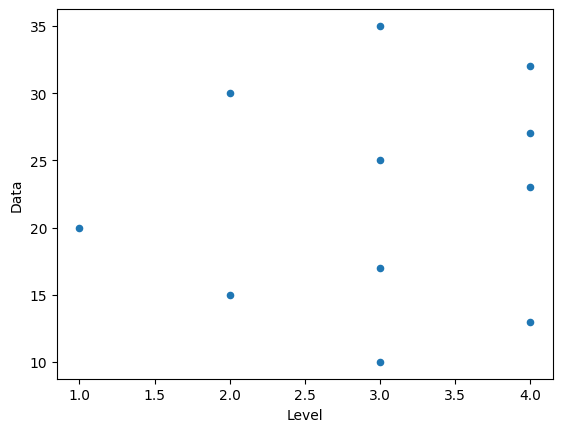

In [8]:
dtTree.plot.scatter(x='Level', y='Data')